Analyze the data and create a processing pipeline. We are interested if we can predict whether a flight gets delayed or not (arr_delay).

Fit a logistic regression, decision tree, and SVM using grid search. Discuss the performance of each model.

Fit an ensemble using the three above models. Does this improvement performance?

Fit a model using AdaBoost. Does this improve performance?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [3]:
#reading data
df=pd.read_csv("C:/Users/Sharath/Desktop/603/DATA602-/Assignment 8/Data/flight-data.csv")

In [4]:
df

carrier  flight tailnum origin dest  air_time  distance  hour  minute  \
0         B6    1201  N643JB    JFK  FLL     135.0      1069    21      50   
1         DL    1773  N3743H    JFK  LAS     287.0      2248    15      35   
2         EV    4572  N11107    EWR  GSP      84.0       594    15       9   
3         B6     179  N526JB    JFK  PHX     305.0      2153    17      35   
4         US    1733  N162UW    LGA  CLT      78.0       544     7      53   
...      ...     ...     ...    ...  ...       ...       ...   ...     ...   
9995      UA     535  N525UA    JFK  LAX     323.0      2475    18      35   
9996      DL    1147  N977DL    LGA  ATL     106.0       762    20       0   
9997      EV    4204  N12163    EWR  OKC       NaN      1325    20       9   
9998      B6     431  N585JB    LGA  SRQ     146.0      1047    13      30   
9999      B6    2302  N368JB    JFK  BUF      64.0       301    16      15   

       temp  ...  precip  pressure  visib                     type  \
0     73.04  ...     0.0    1019.4   10.0  Fixed wing multi engine   
1     71.06  ...     0.0    1020.4   10.0  Fixed wing multi engine   
2     78.80  ...     0.0       NaN    5.0  Fixed wing multi engine   
3     44.06  ...     0.0    1009.2   10.0                      NaN   
4     69.98  ...     0.0    1021.3   10.0  Fixed wing multi engine   
...     ...  ...     ...       ...    ...                      ...   
9995  48.92  ...     0.0    1025.3   10.0                      NaN   
9996  75.02  ...     0.0    1017.3   10.0  Fixed wing multi engine   
9997  37.04  ...     0.0    1017.0    9.0  Fixed wing multi engine   
9998  35.96  ...     0.0    1016.9   10.0  Fixed wing multi engine   
9999  84.02  ...     0.0    1013.0   10.0  Fixed wing multi engine   

                       manufacturer            model  engines  seats  \
0                            AIRBUS         A320-232      2.0  200.0   
1                            BOEING          737-832      2.0  189.0   
2                           EMBRAER        EMB-145XR      2.0   55.0   
3                               NaN              NaN      NaN    NaN   
4                  AIRBUS INDUSTRIE         A321-211      2.0  199.0   
...                             ...              ...      ...    ...   
9995                            NaN              NaN      NaN    NaN   
9996  MCDONNELL DOUGLAS AIRCRAFT CO            MD-88      2.0  142.0   
9997                        EMBRAER        EMB-145XR      2.0   55.0   
9998                         AIRBUS         A320-232      2.0  200.0   
9999                        EMBRAER  ERJ 190-100 IGW      2.0   20.0   

         engine arr_delay  
0     Turbo-fan       1.0  
1     Turbo-jet       0.0  
2     Turbo-fan       1.0  
3           NaN       1.0  
4     Turbo-jet       0.0  
...         ...       ...  
9995        NaN       1.0  
9996  Turbo-fan       1.0  
9997  Turbo-fan       NaN  
9998  Turbo-fan       1.0  
9999  Turbo-fan       0.0  

[10000 rows x 25 columns]

In [5]:
df.shape

(10000, 25)

In [6]:
df.dtypes

carrier          object
flight            int64
tailnum          object
origin           object
dest             object
air_time        float64
distance          int64
hour              int64
minute            int64
temp            float64
dewp            float64
humid           float64
wind_dir        float64
wind_speed      float64
wind_gust       float64
precip          float64
pressure        float64
visib           float64
type             object
manufacturer     object
model            object
engines         float64
seats           float64
engine           object
arr_delay       float64
dtype: object

In [7]:
df.isna().sum()

carrier            0
flight             0
tailnum           74
origin             0
dest               0
air_time         284
distance           0
hour               0
minute             0
temp              48
dewp              48
humid             48
wind_dir         269
wind_speed        49
wind_gust       7613
precip            46
pressure        1192
visib             46
type            1501
manufacturer    1501
model           1501
engines         1501
seats           1501
engine          1501
arr_delay        284
dtype: int64

In [8]:
df.describe()

flight     air_time      distance          hour        minute  \
count  10000.000000  9716.000000  10000.000000  10000.000000  10000.000000   
mean    1993.785200   149.771099   1033.036700     13.185300     26.405800   
std     1637.565161    92.714630    722.747763      4.691094     19.286677   
min        1.000000    21.000000     80.000000      5.000000      0.000000   
25%      580.750000    81.000000    502.000000      9.000000      9.000000   
50%     1511.000000   130.000000    872.000000     13.000000     29.000000   
75%     3514.250000   191.000000   1389.000000     17.000000     45.000000   
max     6181.000000   648.000000   4983.000000     23.000000     59.000000   

              temp         dewp        humid     wind_dir   wind_speed  \
count  9952.000000  9952.000000  9952.000000  9731.000000  9951.000000   
mean     56.885289    41.578652    59.699401   199.824273    11.082228   
std      17.967138    19.360524    19.713338   106.234823     5.635370   
min      10.940000    -9.040000    12.740000     0.000000     0.000000   
25%      42.080000    26.060000    43.920000   120.000000     6.904680   
50%      57.020000    42.800000    57.990000   220.000000    10.357020   
75%      71.960000    57.920000    75.690000   290.000000    14.960140   
max     100.040000    78.080000   100.000000   360.000000    42.578860   

        wind_gust       precip     pressure        visib      engines  \
count  2387.00000  9954.000000  8808.000000  9954.000000  8499.000000   
mean     25.29643     0.004574  1017.805722     9.237887     1.993293   
std       6.14381     0.033679     7.545151     2.043394     0.097400   
min      16.11092     0.000000   985.000000     0.060000     1.000000   
25%      20.71404     0.000000  1012.700000    10.000000     2.000000   
50%      24.16638     0.000000  1017.500000    10.000000     2.000000   
75%      28.76950     0.000000  1022.700000    10.000000     2.000000   
max      66.74524     1.210000  1042.100000    10.000000     4.000000   

             seats    arr_delay  
count  8499.000000  9716.000000  
mean    135.897870     0.410045  
std      72.402517     0.491867  
min       2.000000     0.000000  
25%      55.000000     0.000000  
50%     149.000000     0.000000  
75%     189.000000     1.000000  
max     400.000000     1.000000

# EDA

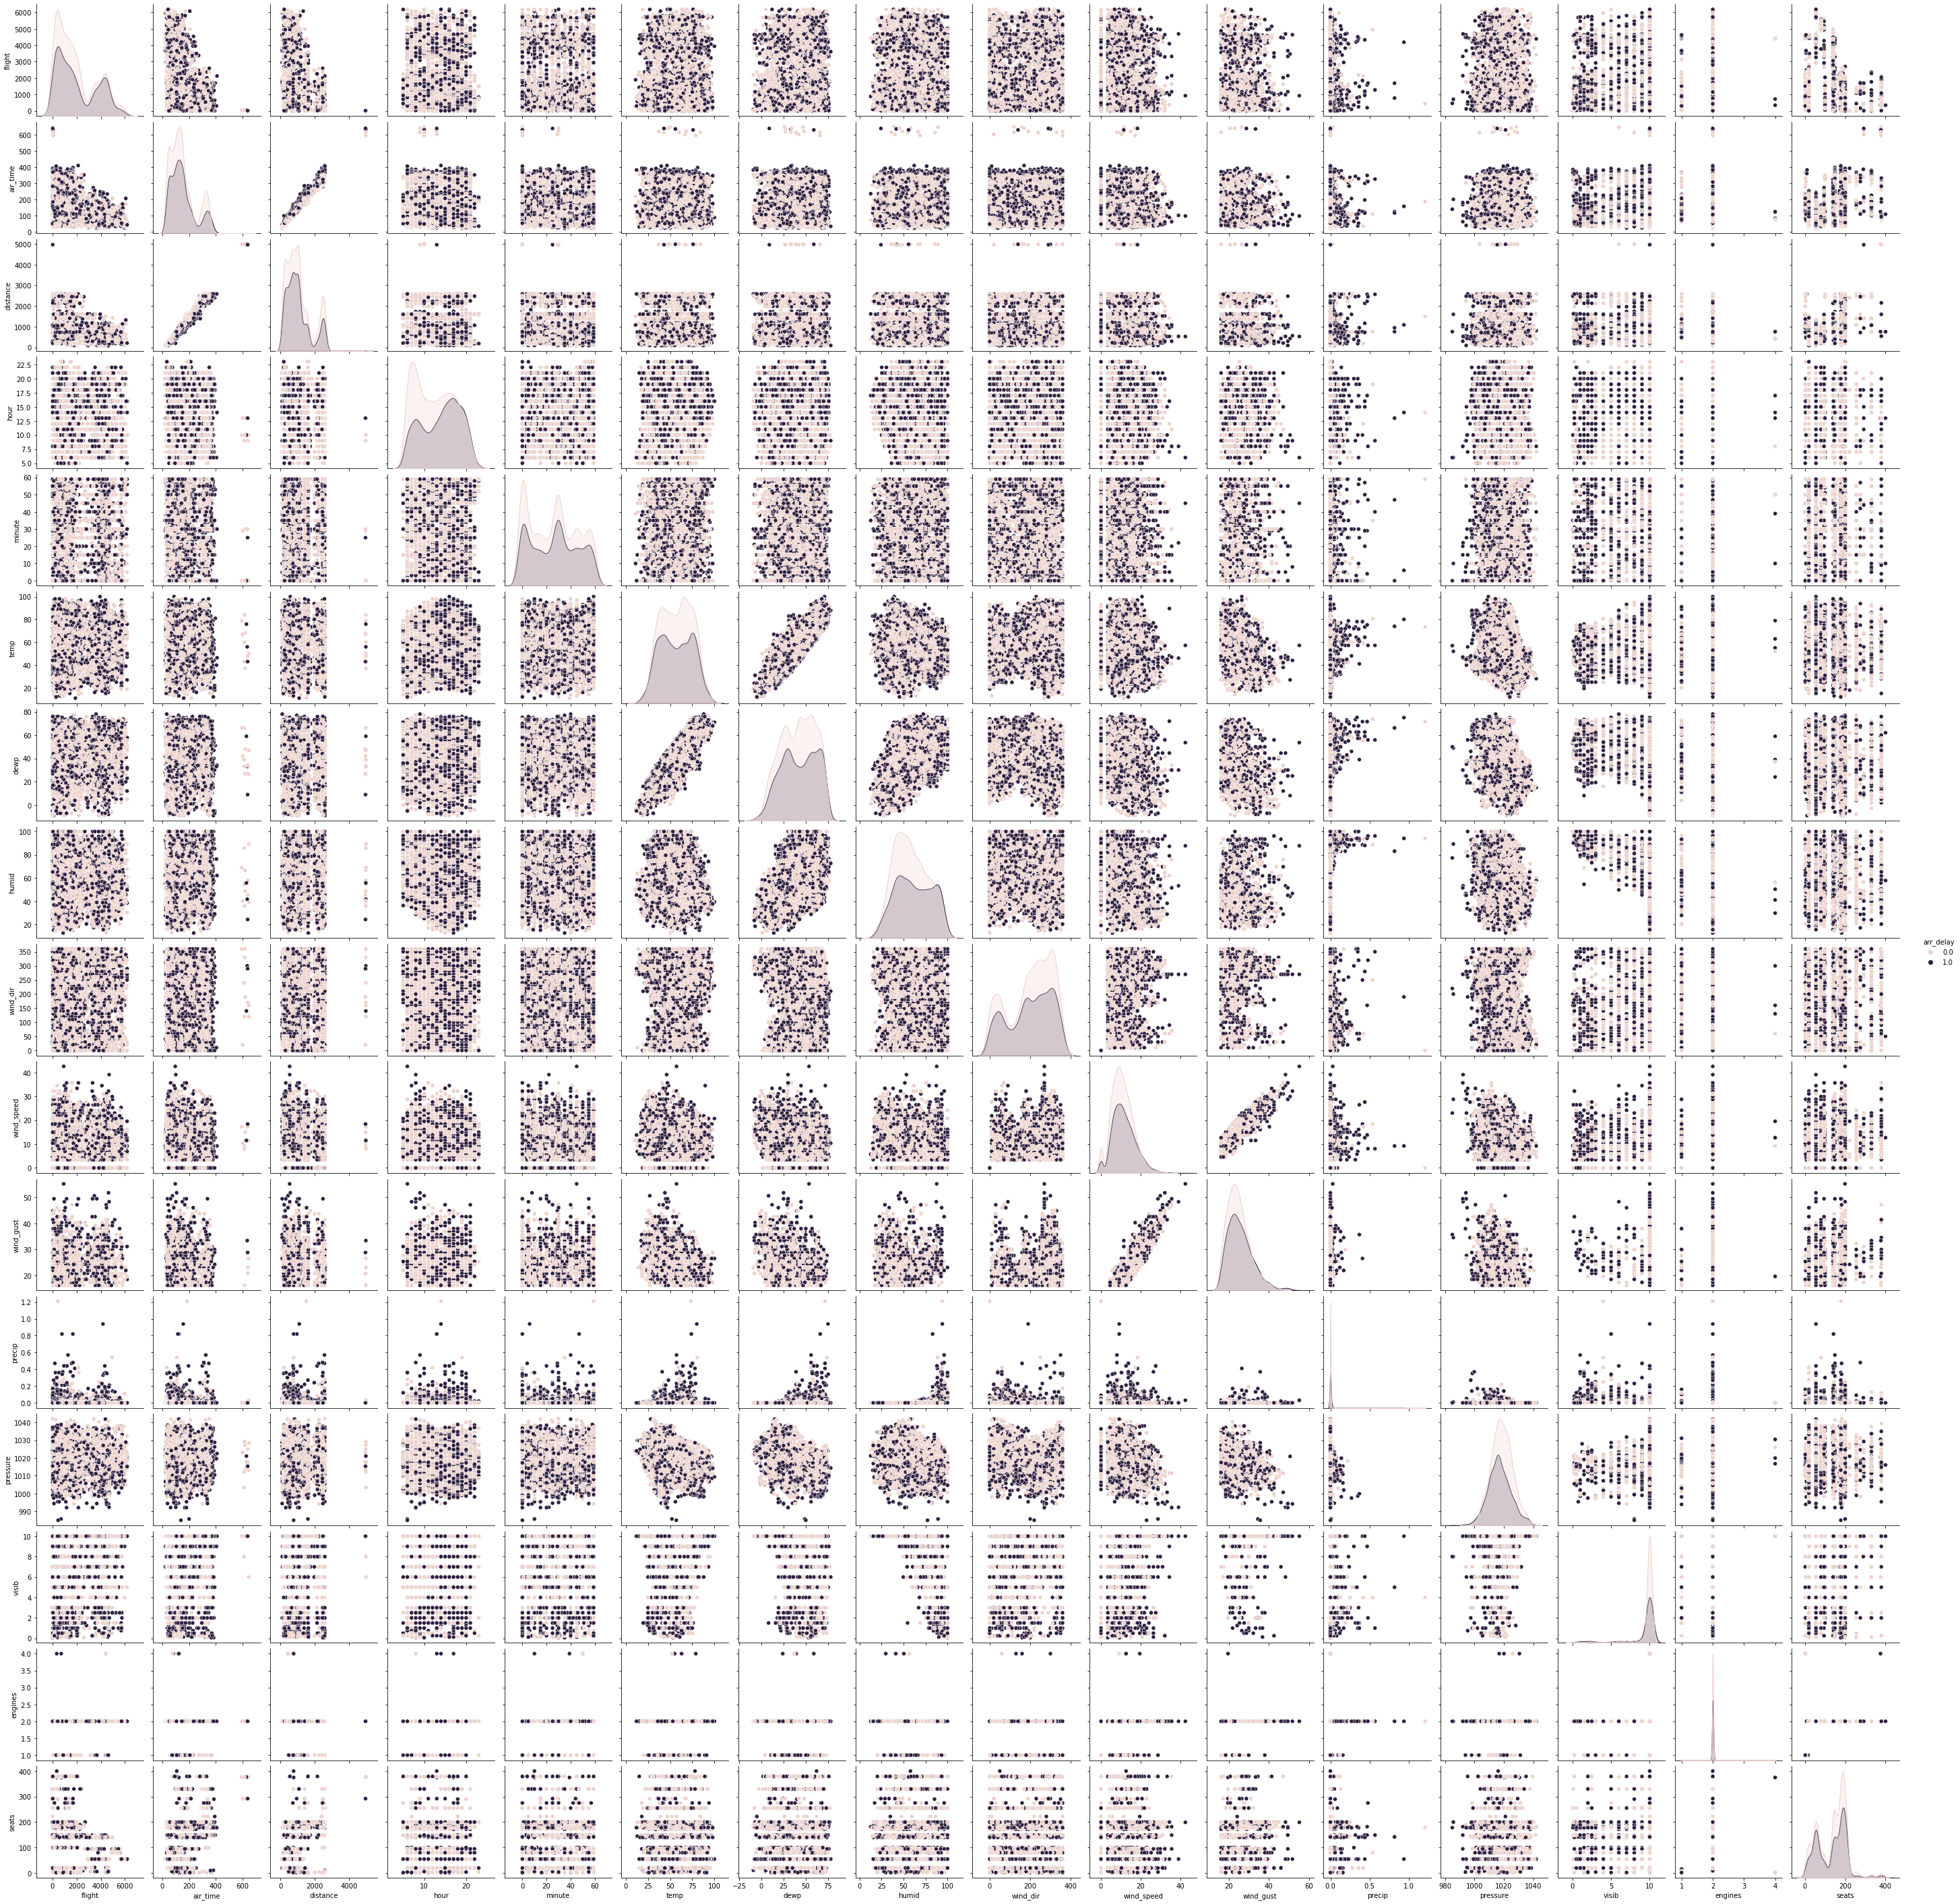

In [15]:
sns.pairplot(df,diag_kind='kde',hue='arr_delay')

# Regression and Scatter Plot

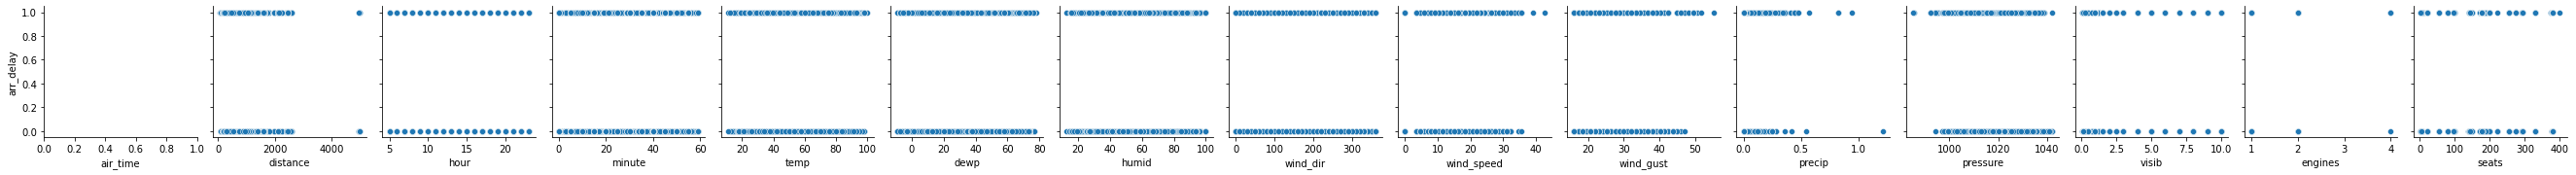

In [13]:
sns.pairplot(df, y_vars='arr_delay', x_vars=["air_time", "distance",
                                                       'hour', 'minute','temp','dewp','humid','wind_dir','wind_speed','wind_gust',
                                               'precip','pressure','visib','engines','seats'
                                                        ])
plt.show()

We can observe that arr_delay column is not linear with any of the variable

In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

# Modelling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
df['arr_delay']= impute.fit_transform(df[['arr_delay']])
#removing all categorical values 

y=df.arr_delay
X=df.drop(['arr_delay'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 8,000
Test examples: 2,000


In [10]:
df.dtypes

carrier          object
flight            int64
tailnum          object
origin           object
dest             object
air_time        float64
distance          int64
hour              int64
minute            int64
temp            float64
dewp            float64
humid           float64
wind_dir        float64
wind_speed      float64
wind_gust       float64
precip          float64
pressure        float64
visib           float64
type             object
manufacturer     object
model            object
engines         float64
seats           float64
engine           object
arr_delay       float64
dtype: object

## Data Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_var = ['air_time','distance','hour','minute','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure'
          ,'visib','engines','seats']
cat_var = ['origin']

numeric_transformer =Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())])

processing_pipeline = ColumnTransformer(
                      transformers=[(
                      "cat", categorical_transformer, cat_var),
                      ("num", numeric_transformer, num_var)])
processing_pipeline

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['origin']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['air_time', 'distance', 'hour', 'minute',
                                  'temp', 'dewp', 'humid', 'wind_dir',
                                  'wind_speed', 'wind_gust', 'precip',
                                  'pressure', 'visib', 'engines', 'seats'])])

### Linear Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model_log = Pipeline([('data_processing',processing_pipeline),('log_reg',LogisticRegression(penalty='l2', solver='lbfgs'))])
model_log

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['origin']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['air_time', 'distance',
                                

In [13]:
from sklearn.model_selection import GridSearchCV

params = [{'log_reg__C':[0.01, 0.1, 1, 10,100,1000]}]
gs_logistic= GridSearchCV(estimator=model_log, param_grid=params, scoring='roc_auc', refit=True)
gs_logistic =gs_logistic.fit(X_train,y_train)


In [14]:
gs_logistic.best_score_

0.6768581044405714

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
model_dt = Pipeline([('data_processing',processing_pipeline),('dtree',DecisionTreeClassifier())])
model_dt

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['origin']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['air_time', 'distance',
                                

In [16]:
grid_dt = [{
 'dtree__max_depth':[1,3,5,10,15,20]}]

gs_decision= GridSearchCV(estimator=model_dt, param_grid=grid_dt, scoring='roc_auc', refit=True)
gs_decision =gs_decision.fit(X_train,y_train)

In [17]:
gs_decision.best_score_

0.628547323944729

### SVM

In [28]:
from sklearn.svm import SVC
gs_svm = modeling_pipeline = Pipeline([('data_processing',processing_pipeline),
                                       ('model', SVC(probability=True))])
param_grid = [
  {'model__C': [0.01, 0.1, 1, 10], 'model__kernel': ['linear']}
 ]

svm_results = GridSearchCV(estimator=gs_svm, param_grid=param_grid, scoring='roc_auc', refit=True)
svm_results = svm_results.fit(X_train,y_train)

In [29]:
svm_results.best_score_

0.68034343825778

In [30]:
svm_score = svm_results.score(X_test, y_test)
dtree_score = gs_decision.score(X_test, y_test)
lreg_score = gs_logistic.score(X_test, y_test)


print(f'Logistic Regression Score: {lreg_score:.2%}')
print(f'Decision Tree Score: {dtree_score:.2%}')
print(f'Support Vector Machine Score: {svm_score:.2%}')

Logistic Regression Score: 66.81%
Decision Tree Score: 64.91%
Support Vector Machine Score: 66.83%


## Ensemble Learning

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

ems = [('lr', model_log),('dt', model_dt),('svm', gs_svm)]
ensemble1 = VotingClassifier(estimators= ems, weights=None, voting='soft')
ensemble1


VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('data_processing',
                                               ColumnTransformer(transformers=[('cat',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('encoder',
                                                                                                 OneHotEncoder())]),
                                                                                ['origin']),
                                                                               ('num',
                                                                                Pipeline(steps=[('imputer',
                                                   

In [32]:
scores = cross_val_score(estimator=ensemble1, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

ROC AUC 0.66 (+/- 0.02) [Ensemble]


### ADA Boosting

In [33]:
from sklearn.ensemble import AdaBoostClassifier

# multi-step pipelines don't play as nice with AdaBoost
xt = processing_pipeline.fit_transform(X_train)

params = {'base_estimator__max_depth': [1,2],
         'n_estimators': [50, 100, 200, 400]
         }

#ABC = AdaBoostClassifier(base_estimator=p2)
ABC = AdaBoostClassifier(DecisionTreeClassifier())


ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='accuracy')
           
ad_gscv = ad_gscv.fit(xt, y_train)

print(f'Validation score: {ad_gscv.best_score_:.2%}')

xtt = processing_pipeline.transform(X_test)

ad_pred = ad_gscv.predict(xtt)

print(f'Test score: {ad_gscv.score(xtt, y_test):.2%}')

Validation score: 68.25%
Test score: 68.40%


In [35]:
from sklearn.ensemble import AdaBoostClassifier

# multi-step pipelines don't play as nice with AdaBoost
xt = processing_pipeline.fit_transform(X_train)

params = {'base_estimator__C':[0.01, 0.1, 1, 10,100,1000],
         'n_estimators': [50, 100, 200, 400]
         }

#ABC = AdaBoostClassifier(base_estimator=p2)
ABC = AdaBoostClassifier(LogisticRegression(penalty='l2', solver='lbfgs'))


ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='accuracy')
           
ad_gscv = ad_gscv.fit(xt, y_train)

print(f'Validation score: {ad_gscv.best_score_:.2%}')

xtt = processing_pipeline.transform(X_test)

ad_pred = ad_gscv.predict(xtt)

print(f'Test score: {ad_gscv.score(xtt, y_test):.2%}')

Validation score: 64.19%
Test score: 63.70%


In [36]:
from sklearn.ensemble import AdaBoostClassifier

# multi-step pipelines don't play as nice with AdaBoost
xt = processing_pipeline.fit_transform(X_train)

params = {'base_estimator__C':[1,2],
         'n_estimators': [50, 100, 200, 400]
         }

#ABC = AdaBoostClassifier(base_estimator=p2)
ABC = AdaBoostClassifier(SVC(probability=True))


ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='accuracy')
           
ad_gscv = ad_gscv.fit(xt, y_train)

print(f'Validation score: {ad_gscv.best_score_:.2%}')

xtt = processing_pipeline.transform(X_test)

ad_pred = ad_gscv.predict(xtt)

print(f'Test score: {ad_gscv.score(xtt, y_test):.2%}')

KeyboardInterrupt: 